In [3]:
import numpy as np
import pylab as plt
from aa_uv.io import hdf5_to_uvx
from aa_uv.postx import ApertureArray
from aa_uv.utils import get_test_data

In [4]:
test_data =  {
    'aavs2': (get_test_data('aavs2/correlation_burst_100_20211113_14447_0.hdf5'),
              get_test_data('aavs2/correlation_burst_204_20211113_14653_0.hdf5')),
    'aavs3': (get_test_data('aavs3/correlation_burst_100_20240107_19437_0.hdf5'),
              get_test_data('aavs3/correlation_burst_204_20240107_19437_0.hdf5')),
    'eda2':  (get_test_data('eda2/correlation_burst_100_20211211_14167_0.hdf5'),
              get_test_data('eda2/correlation_burst_204_20211211_14373_0.hdf5')),
}

2024-07-11 13:07:31.351 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:39 - Using internal config eda2
/Users/daniel.price/Data/aavs_uv/src/aa_uv/datamodel/uvx.py:184: FutureWarning: Setting the location attribute post initialization will be disallowed in a future version of Astropy. Instead you should set the location when creating the Time object. In the future, this will raise an AttributeError.
  t.location = eloc
2024-07-11 13:07:31.405 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:211 - Conjugating data
2024-07-11 13:07:31.408 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:183 - Could not find expected keys in observation_info
2024-07-11 13:07:31.408 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:185 - <KeysViewHDF5 []>
2024-07-11 13:07:31.610 | INFO     | aa_uv.postx.calibration.holography:jishnu_phasecal:307 - Iter 1: Iteration phase std minima reached, breaking
2024-07-11 13:07:33.838 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:39 - Using internal config aavs

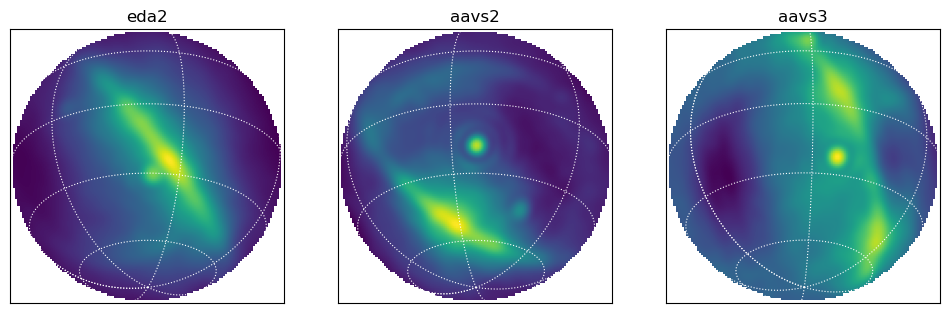

In [8]:
telescopes = ('eda2', 'aavs2', 'aavs3')
plt.figure(figsize=(12, 4))

for ii, telescope in enumerate(telescopes):
    uvx = hdf5_to_uvx(test_data[telescope][0], telescope_name=telescope)
    aa = ApertureArray(uvx)

    aa.calibration.holography.set_cal_src(aa.coords.get_sun())
    cal = aa.calibration.holography.run_phasecal()
    aa.set_cal(cal)

    img = aa.imaging.make_image()
    aa.viewer.orthview(img, sfunc=np.log, subplot_id=(1,3,ii+1), title=telescope)

plt.savefig('images/allsky_triptych.png')

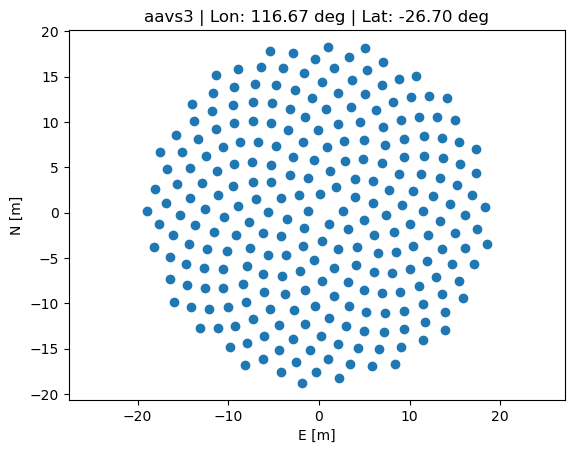

In [9]:
aa.plotting.plot_antennas()
plt.savefig('images/antennas.png')

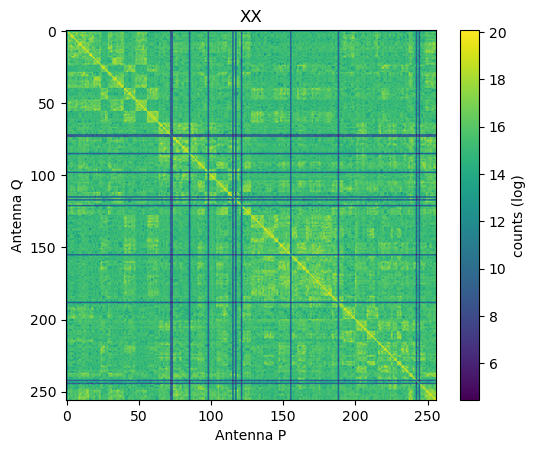

In [10]:
aa.plotting.plot_corr_matrix()
plt.savefig('images/aa_corr.png')

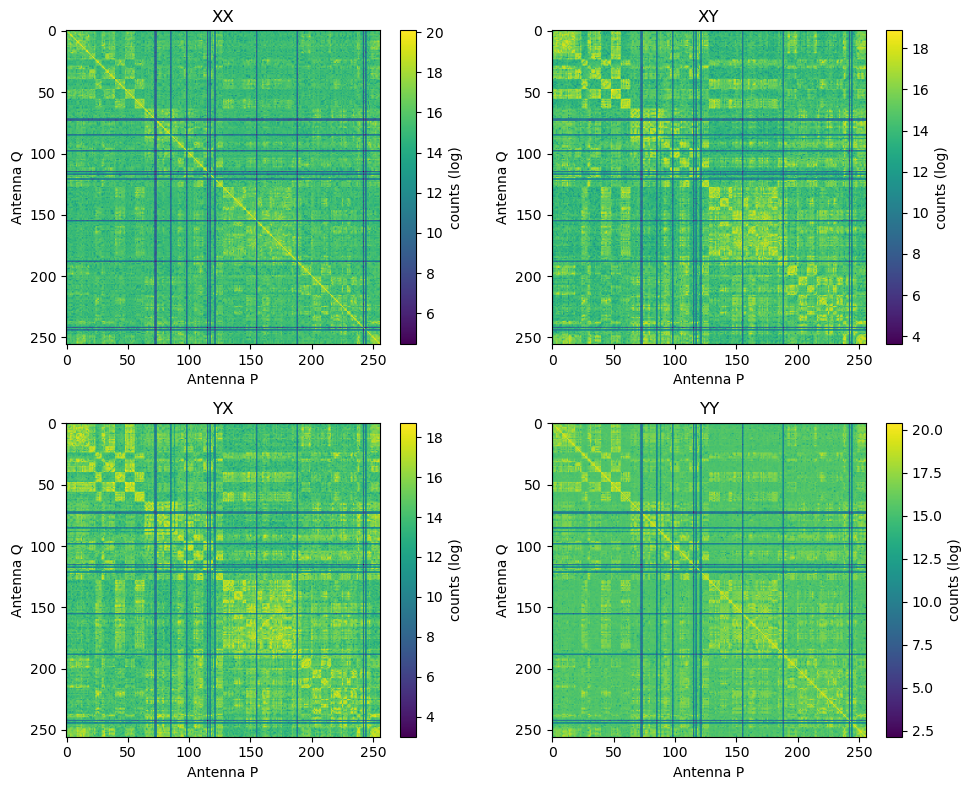

<Figure size 640x480 with 0 Axes>

In [11]:
aa.plotting.plot_corr_matrix_4pol()
plt.savefig('images/aa_corr_4p.png')

In [13]:
aa.viewer

<Aperture Array module: All Sky Viewer>
An all-sky imager based on matplotlib imshow with WCS support.

    Provides the following:
        orthview() - Plot all-sky image in Orthographic projection
        mollview() - Plot all-sky image using healpy Mollview
        load_labels() - Load dictionary of sky coordinates as labels
        get_pixel() - get pixel ID for a given skycoord
        write_fits() - write to FITS file
        orthview_gsm() - orthview plot observed Global diffuse sky model using pygdsm
        mollview_gsm() - mollview plot observed Global diffuse sky model using pygdsm
    

2024-07-11 13:08:31.738 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:39 - Using internal config aavs2
/Users/daniel.price/Data/aavs_uv/src/aa_uv/datamodel/uvx.py:184: FutureWarning: Setting the location attribute post initialization will be disallowed in a future version of Astropy. Instead you should set the location when creating the Time object. In the future, this will raise an AttributeError.
  t.location = eloc
2024-07-11 13:08:31.765 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:211 - Conjugating data
2024-07-11 13:08:31.768 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:183 - Could not find expected keys in observation_info
2024-07-11 13:08:31.769 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:185 - <KeysViewHDF5 []>


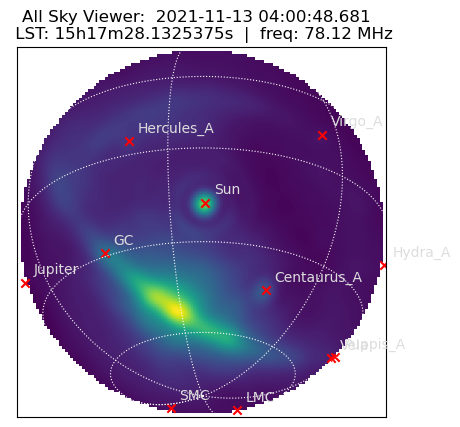

In [15]:
from aa_uv.postx import sky_model

sm = sky_model.generate_skycat(aa)

aa = ApertureArray(hdf5_to_uvx(test_data['aavs2'][0], telescope_name='aavs2'))
aa.viewer.load_labels(sm)
aa.viewer.orthview(overlay_srcs=True)
#plt.savefig('asv-skycat.png')

2024-07-11 13:08:54.624 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:39 - Using internal config aavs2
/Users/daniel.price/Data/aavs_uv/src/aa_uv/datamodel/uvx.py:184: FutureWarning: Setting the location attribute post initialization will be disallowed in a future version of Astropy. Instead you should set the location when creating the Time object. In the future, this will raise an AttributeError.
  t.location = eloc
2024-07-11 13:08:54.659 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:211 - Conjugating data
2024-07-11 13:08:54.662 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:183 - Could not find expected keys in observation_info
2024-07-11 13:08:54.662 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:185 - <KeysViewHDF5 []>
2024-07-11 13:08:54.846 | INFO     | aa_uv.postx.calibration.holography:jishnu_selfholo:222 - Generating vis matrix: data


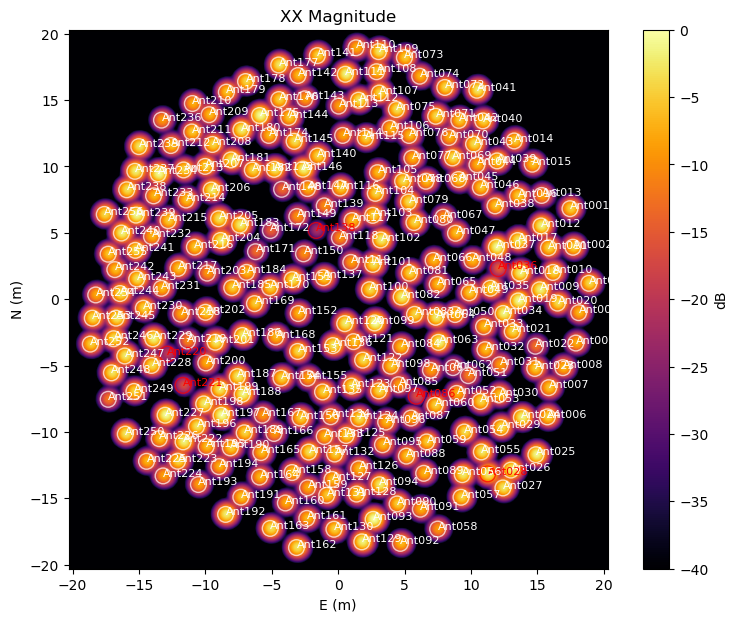

In [16]:
plt.figure(figsize=(9, 7))
aa = ApertureArray(hdf5_to_uvx(test_data['eda2'][1], telescope_name='aavs2'))
aa.calibration.holography.set_cal_src(aa.coords.get_sun())
holo_dict = aa.calibration.holography.run_selfholo(abs_max=4, oversample_factor=3)
aa.calibration.holography.plot_aperture(annotate=True)
#plt.savefig('images/aperture.png')

/Users/daniel.price/Data/aavs_uv/src/aa_uv/postx/calibration/holography.py:589: RuntimeWarning: invalid value encountered in arccos
  theta = np.rad2deg(np.arccos(holo_dict['lmn_grid'][0,:, 0])) - 90


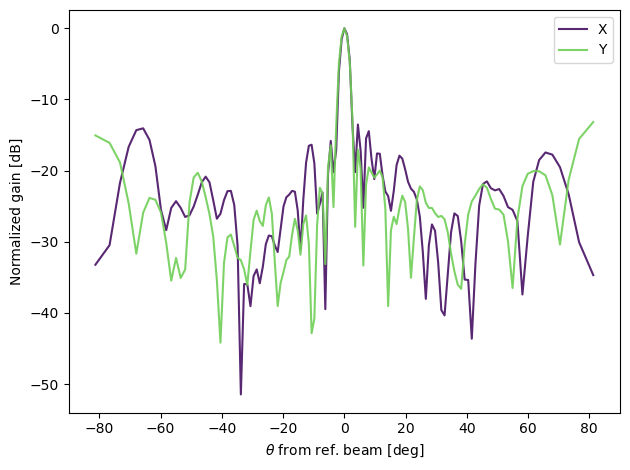

In [17]:
aa.calibration.holography.plot_farfield_beam_pattern()

In [32]:
holo_dict['aperture_size'] / holo_dict['oversample_factor'] / 2

60.89891895225372

In [1]:
from aa_uv.postx.calibration import gsm_sim
from aa_uv.acacia import AcaciaStorage
from aa_uv.postx import ApertureArray

acacia = AcaciaStorage()
bucket = 'devel'
fpath  = 'test/correlation_burst_204_20210612_16699_0.uvx'
h5 = acacia.get_h5(bucket, fpath, debug=True)

uvx = acacia.read_uvx(bucket, fpath)

2024-05-09 14:26:35.674 | DEBUG    | aa_uv.acacia.acacia:get_h5:73 - Setting up h5py debug trace
2024-05-09 14:26:35.674 | DEBUG    | aa_uv.acacia.acacia:get_url:67 - URL: https://ingest.pawsey.org.au/devel/test/correlation_burst_204_20210612_16699_0.uvx


In [6]:
aa = ApertureArray(uvx)

In [9]:
aa.holography.set_cal_src(aa.get_sun())

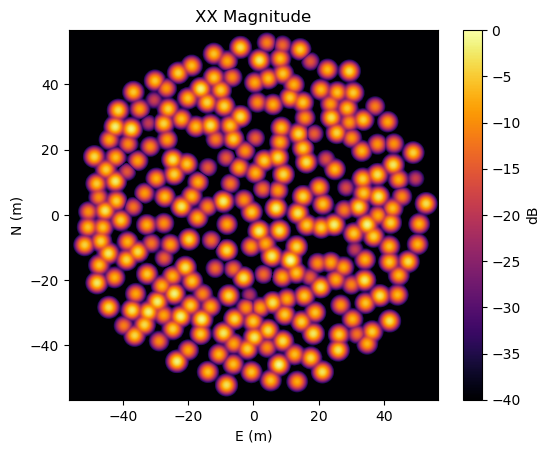

In [12]:
#aa = ApertureArray(uvx)
import pylab as plt
#aa.holography.set_cal_src(aa.get_sun())
holo_dict = aa.holography.run_selfholo()
aa.holography.plot_aperture(plot_type='mag')
plt.show()

In [3]:
test_data = get_test_data('aavs3/correlation_burst_100_20240107_19437_0.hdf5')
uvx = hdf5_to_uvx(test_data, telescope_name='aavs3')
aa = ApertureArray(uvx)

2024-05-10 15:23:15.099 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:33 - Using internal config aavs3
2024-05-10 15:23:15.489 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:203 - Conjugating data
2024-05-10 15:23:15.492 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:174 - Could not find expected keys in observation_info
2024-05-10 15:23:15.492 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:176 - <KeysViewHDF5 []>


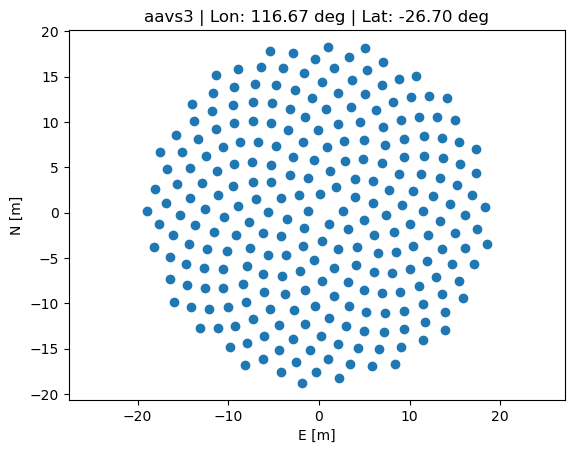

In [4]:
aa.plotting.plot_antennas()

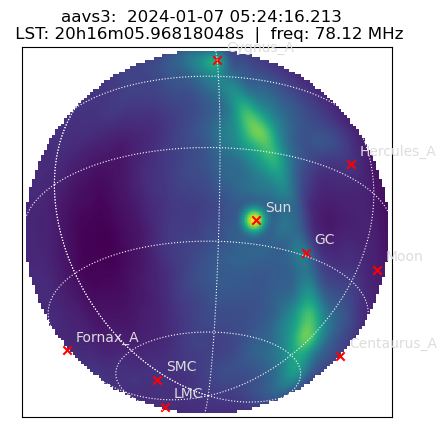

In [16]:
img = aa.make_image()
aa.viewer.plot(img, overlay_srcs=True)

In [20]:

import pylab as plt

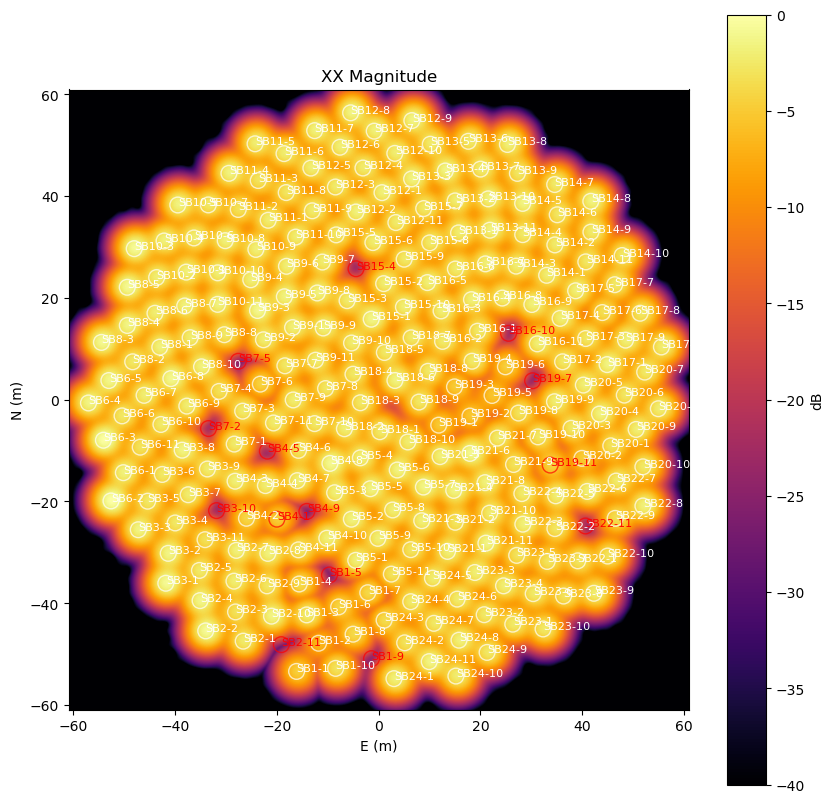

In [21]:
plt.figure(figsize=(10,10))
aa.holography.set_cal_src(aa.get_sun())
aa.holography.run_selfholo()
aa.holography.plot_aperture(annotate=True)

In [8]:
uvx.data

<xarray.DataArray (time: 1, frequency: 1, baseline: 32896, polarization: 4)>
array([[[[ 5.19224352e+08+0.0000000e+00j,
           1.59333560e+07+6.9698880e+06j,
           1.59333560e+07-6.9698890e+06j,
           1.27387738e+09+0.0000000e+00j],
         [-7.35387000e+05+1.3377605e+07j,
           4.98870200e+06-3.1911070e+06j,
           1.48854200e+06+7.2020600e+05j,
          -4.86486000e+05+3.8798328e+07j],
         [-3.63579080e+07-3.0757572e+07j,
           2.34306640e+07-1.1523972e+07j,
           1.30155640e+07-2.2524288e+07j,
           4.05058800e+07-8.3969488e+07j],
         ...,
         [ 1.86250637e+09+0.0000000e+00j,
           4.13686480e+07+1.7634728e+07j,
           4.13686480e+07-1.7634728e+07j,
           2.64334182e+09+0.0000000e+00j],
         [ 7.85522688e+08+2.2681619e+08j,
           8.31512960e+07+3.9087328e+07j,
           7.83135600e+07-1.6913722e+07j,
           1.01604819e+09+3.2393584e+08j],
         [ 2.17479475e+09+0.0000000e+00j,
           1.01540264e+08+6.0679172e+07j,
           1.01540264e+08-6.0679188e+07j,
           2.72211840e+09+0.0000000e+00j]]]], dtype=complex64)
Coordinates:
  * time          (time) object MultiIndex
  * mjd           (time) float64 5.956e+04
  * lst           (time) float64 17.05
  * unix          (time) float64 1.639e+09
  * polarization  (polarization) <U2 'XX' 'XY' 'YX' 'YY'
  * baseline      (baseline) object MultiIndex
  * ant1          (baseline) int64 0 0 0 0 0 0 0 ... 252 253 253 253 254 254 255
  * ant2          (baseline) int64 0 1 2 3 4 5 6 ... 255 253 254 255 254 255 255
  * frequency     (frequency) float64 7.812e+07
Attributes:
    unit:     uncalib

In [10]:
uvx.data.time.mjd

<xarray.DataArray 'mjd' (time: 1)>
array([59559.163986])
Coordinates:
  * time     (time) object MultiIndex
  * mjd      (time) float64 5.956e+04
  * lst      (time) float64 17.05
  * unix     (time) float64 1.639e+09

In [2]:
aa

NameError: name 'aa' is not defined

In [5]:
uvx = hdf5_to_uvx(test_data['aavs3'][0], telescope_name='aavs3')
aa = ApertureArray(uvx)

2024-07-12 20:53:40.024 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:39 - Using internal config aavs3
/Users/daniel.price/Data/aavs_uv/src/aa_uv/datamodel/uvx.py:184: FutureWarning: Setting the location attribute post initialization will be disallowed in a future version of Astropy. Instead you should set the location when creating the Time object. In the future, this will raise an AttributeError.
  t.location = eloc
2024-07-12 20:53:40.440 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:211 - Conjugating data
2024-07-12 20:53:40.443 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:183 - Could not find expected keys in observation_info
2024-07-12 20:53:40.444 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:185 - <KeysViewHDF5 []>


-0.46607408997555755

In [23]:
from astropy.coordinates import position_angle

In [16]:
zen = aa.coords.get_zenith()

In [26]:
app_ra  = aa.t.sidereal_time('apparent').to('rad')
app_dec = aa.earthloc.geodetic.lat.to('rad')

icrs_ra  = zen.ra.to('rad')
icrs_dec = zen.dec.to('rad')

In [30]:
from pyuvdata import utils

In [47]:
app_ra, app_dec, icrs_ra, icrs_dec

(<Longitude [5.30623494] rad>,
 <Latitude -0.46607409 rad>,
 <Longitude 5.30001078 rad>,
 <Latitude -0.46731192 rad>)

In [27]:
position_angle(app_ra, app_dec, icrs_ra, icrs_dec)

<Angle [4.49187523] rad>

In [49]:
app_ra  = aa.t.sidereal_time('apparent').to('rad').value
app_dec = np.zeros_like(app_ra) + uvx.origin.geodetic.lat.to('rad').value

In [50]:
utils.calc_frame_pos_angle(aa.t.jd, 
                           app_ra, 
                           app_dec, 
                           aa.earthloc, 
                           ref_frame='icrs', 
                           ref_epoch='J2000')

array([-0.00214677])

In [53]:
utils.calc_frame_pos_angle(aa.t.jd,
                       app_ra,
                       app_dec,
                       telescope_loc=aa.earthloc,
                       ref_frame='icrs',
                       ref_epoch='J2000',
                       telescope_frame='itrs',
                       ellipsoid='SPHERE',
                       )

array([-0.00214677])